In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)
import matplotlib.pyplot as plt
import seaborn
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from langdetect import detect
%matplotlib inline

In [2]:
df = pd.read_csv('Shoes_Data.csv')

In [3]:
df

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type
0,CLYMB Outdoor Sports Running Shoes for Mens Boy,₹279.00,2.9 out of 5 stars,2389 ratings,Elevate your style with this classy pair of Ru...,Not happy with product|| It's not as expected....,1.0 out of 5 stars|| 1.0 out of 5 stars|| 3.0 ...,Men
1,Bourge Men's Loire-z126 Running Shoes,₹479.00,3.9 out of 5 stars,11520 ratings,The product will be an excellent pick for you....,Memory cushioning in these shoes is the best f...,5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...,Men
2,T-Rock Men's Sneaker,₹430.00,3.3 out of 5 stars,1251 ratings,Flaunt with these stylish and unique red casua...,Worth to its amount|| Go for it|| Perfect|| 5 ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men
3,Robbie jones Sneakers Casual Canvas Fabric Col...,₹499.00,4.2 out of 5 stars,3 ratings,Robbie Jones Shoes Are Designed To Keeping In ...,Sup quality|| Good but not expected|| Awesome 👌.!,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Men
4,Sparx Men's Sd0323g Sneakers,₹499.00,4.2 out of 5 stars,20110 ratings,Sparx is a spectacular range of footwear from ...,Best|| Satisfied!|| Affordable beauty 😘😘😘😘 the...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men
...,...,...,...,...,...,...,...,...
1225,Nike Men's React Vision Running Shoes,₹7256.00,4.4 out of 5 stars,200 ratings,The Nike react vision is a STORY of surreal co...,Must buy|| not have a great fiting but great q...,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Women
1226,Puma Men's B.O.G Limitless Hi Evoknit Sneakers,₹5822.00,4.3 out of 5 stars,25 ratings,The B.O.G limitless is Puma's key style for th...,Worth buying !|| Classy Bold and Stylish !!|| ...,4.0 out of 5 stars|| 5.0 out of 5 stars|| 3.0 ...,Women
1227,new balance Women's FuelCell Echolucent Runnin...,₹5362.00,4.5 out of 5 stars,817 ratings,Lead the pack in New Balance’s Echolucent snea...,size variation in product recd n size chart|| ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Women
1228,Nike Women's WMNS Air Zoom Pegasus 37 Running ...,₹7480.00,4.5 out of 5 stars,67 ratings,Nike మహిళల రన్నింగ్ షూ ఫీల్స్ మరియు రూపం మృదువ...,Verified Purchase|| Verified Purchase|| Verifi...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 4.0 ...,Women


Преобразую числовые столбики в числа (откидываю кое-где части, т.к. они нули везде)

In [ ]:
df['rating'] = [float(row.split()[0]) for row in df['rating']]

for ind, row in enumerate(df['reviews_rating']):
    splitted_row = row.split('|| ')
    score = []
    for review in splitted_row:
        review = int(review[0:1])
        score.append(review)
    df['reviews_rating'][ind] = score

In [5]:
df['price'] = [float(row[1:].split('.')[0]) for row in df['price']]

А также разобью отзывы на один продукт на отдельные отзывы

In [ ]:
for ind, row in enumerate(df['reviews']):
    splitted_row = row.split('|| ')
    score = []
    for review in splitted_row:
        score.append(review)
    df['reviews'][ind] = score

In [7]:
df

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type
0,CLYMB Outdoor Sports Running Shoes for Mens Boy,279.0,2.9,2389 ratings,Elevate your style with this classy pair of Ru...,"[Not happy with product, It's not as expected....","[1, 1, 3, 3, 3, 2, 1, 2, 1, 1]",Men
1,Bourge Men's Loire-z126 Running Shoes,479.0,3.9,11520 ratings,The product will be an excellent pick for you....,[Memory cushioning in these shoes is the best ...,"[5, 1, 5, 5, 4, 5, 5, 5, 4, 5]",Men
2,T-Rock Men's Sneaker,430.0,3.3,1251 ratings,Flaunt with these stylish and unique red casua...,"[Worth to its amount, Go for it, Perfect, 5 st...","[5, 5, 5, 5, 1, 1, 5, 4, 1, 1]",Men
3,Robbie jones Sneakers Casual Canvas Fabric Col...,499.0,4.2,3 ratings,Robbie Jones Shoes Are Designed To Keeping In ...,"[Sup quality, Good but not expected, Awesome 👌.!]","[5, 3, 5]",Men
4,Sparx Men's Sd0323g Sneakers,499.0,4.2,20110 ratings,Sparx is a spectacular range of footwear from ...,"[Best, Satisfied!, Affordable beauty 😘😘😘😘 the ...","[5, 5, 5, 5, 5, 5, 1, 3, 2, 5]",Men
...,...,...,...,...,...,...,...,...
1225,Nike Men's React Vision Running Shoes,7256.0,4.4,200 ratings,The Nike react vision is a STORY of surreal co...,"[Must buy, not have a great fiting but great q...","[5, 3, 5, 5, 5, 5, 5, 2, 4, 5]",Women
1226,Puma Men's B.O.G Limitless Hi Evoknit Sneakers,5822.0,4.3,25 ratings,The B.O.G limitless is Puma's key style for th...,"[Worth buying !, Classy Bold and Stylish !!, N...","[4, 5, 3, 5, 5, 5, 5, 5, 5, 5]",Women
1227,new balance Women's FuelCell Echolucent Runnin...,5362.0,4.5,817 ratings,Lead the pack in New Balance’s Echolucent snea...,"[size variation in product recd n size chart, ...","[5, 5, 5, 5, 1, 5, 3, 2, 5, 5]",Women
1228,Nike Women's WMNS Air Zoom Pegasus 37 Running ...,7480.0,4.5,67 ratings,Nike మహిళల రన్నింగ్ షూ ఫీల్స్ మరియు రూపం మృదువ...,"[Verified Purchase, Verified Purchase, Verifie...","[5, 5, 4, 5, 5, 5, 5, 3, 5, 1]",Women


In [8]:
df = df.drop(['total_reviews'], axis=1)
df = df.drop(['Shoe Type'], axis=1)

Сразу уберу неанлийский язык, потому что размер дф не оч большой, так что лангдетек простой и удобный способ

In [9]:
for ind, descr in enumerate(df['product_description']):
    try:
        if detect(descr) != 'en':
            df = df.drop(ind)
    except: # может быть LangDetectException, но она не встает на место исключения как ошибка
        pass
df = df.reset_index(drop=True)

Средний рейтинг тяготеет к 4, цена к 2000

In [10]:
df.describe()

,price,rating
count,1176.000000,1176.000000
mean,1965.300170,3.955357
std,1681.920662,0.460570
min,127.000000,1.000000
25%,608.000000,3.800000
50%,1509.000000,4.000000
75%,2748.250000,4.200000
max,7992.000000,5.000000


У цен есть заметные выбросы в высоком ценовом сегменте. Предполагаю, что для модели это создат трудности

<AxesSubplot:>

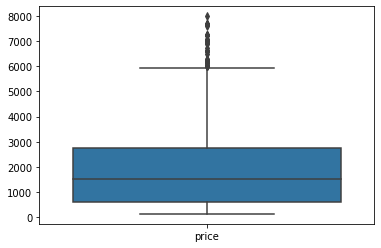

In [11]:
import seaborn as sns

sns.boxplot(data=df[['price']])

Рейтинги сосредоточены в 3-5 баллах, с выбросами в 1

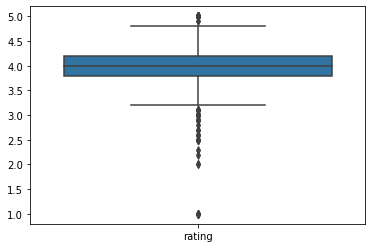

In [12]:
ax = sns.boxplot(data=df[['rating']])

Я бы не назвал распределение оценок нормальным, но ничего критичного.

<AxesSubplot:>

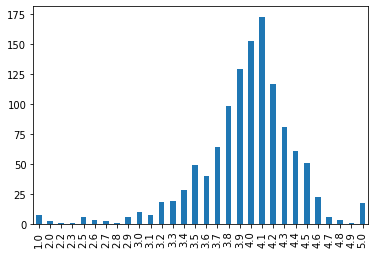

In [13]:
df['rating'].value_counts().sort_index().plot.bar()

А вот распределение цен сосредоточено в диапозоне 100-1000 евро.<br>
Могу предположить, что для дорогих товаров будут какие-то специальные слова.<br>
Или наоборот, дорогие товары не смогут предсказываться.

<AxesSubplot:>

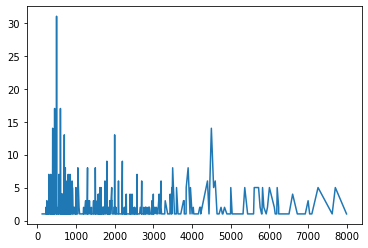

In [14]:
df['price'].value_counts().sort_index().plot()

Длина описания ожидаема похожа на другие графики.<p>

In [15]:
df['product_description_len'] = [len(descr) for descr in df['product_description']]

<AxesSubplot:>

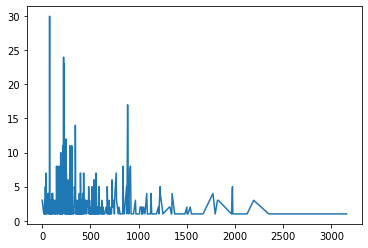

In [16]:
df['product_description_len'].value_counts().sort_index().plot()

Длина отзывов обычно короткая, но с выбросами по несколько тысяч знаков

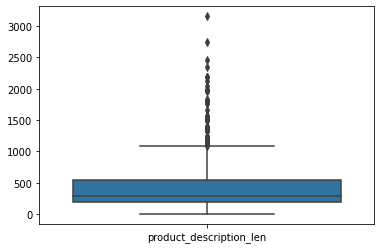

In [17]:
ax = sns.boxplot(data=df[['product_description_len']])

Корреляции довольно интересные (но они очень слабые!).<p>
Чем больше цена, тем больше рейтинг.<p>
Чем больше отзывов, тем меньше цена (массовость продукта)<p>
Но чем больше пишут про продукт (в длине), тем он дороже.

In [18]:
df.corr()

,price,rating,product_description_len
price,1.000000,0.206340,0.100968
rating,0.206340,1.000000,0.028269
product_description_len,0.100968,0.028269,1.000000


Подготовлю раздел описания. Очищу стопслова, лемматзирую. Мне кажется, вполне достаточно, это позволит найти уникальные слова для групп отзывов.

In [19]:
from string import punctuation
punctuation += '...' + '—' + '…' + '«»'
import nltk
from nltk.corpus import stopwords
import re
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RepeatedKFold, GridSearchCV

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\trekc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from tqdm import tqdm


for ind, descr in tqdm(enumerate(df['product_description'])):
    descr = [word.lower().strip().strip(punctuation) for word in nltk.word_tokenize(descr)]
    descr = [lemmatizer.lemmatize(w) for w in descr]
    descr = [word for word in descr if word != '' or word != ' ']
    descr = ' '.join([x for x in descr if x not in stopwords.words('english')])   
    df['product_description'][ind] = descr
    if df['product_description'][ind] == '':
        df = df.drop(ind)

df = df.reset_index(drop=True)

Train либо автоматом ставится, либо 0.75, т.к. довольно мало данных

In [21]:
corpus = []
for row in df['product_description']:
    corpus.append(row)

In [22]:
y = np.array(df['price'])

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

vect1 = CountVectorizer()
X1 = vect1.fit_transform(corpus)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.70, random_state=42)

In [24]:
vect = TfidfVectorizer()
X = vect.fit_transform(corpus)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=42)

### Функция скоринга

In [25]:
from sklearn.metrics import *
def scoring(y_test, y_pred):
    print('MRSE (0 is better): ', mean_squared_error(y_test, y_pred, squared=False))
    print('MAE (0 is better): ', mean_absolute_error(y_test, y_pred))
    print('EVS (1 is better): ', explained_variance_score(y_test, y_pred)) # 1 is better
    print('ME (0 is better): ', max_error(y_test, y_pred)) #shock
    print('R2 (1 is better): ', r2_score(y_test, y_pred)) # 1 is better
    print('MAPE (0 is better): ', mean_absolute_percentage_error(y_test, y_pred)) # 0 is better

In [26]:
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=3,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

Далее будет проблема того, как сказать модели, что нельзя негативные значения. Я хз

# LR

In [27]:
# почему-то возникала ошибка UserWarning:
# One or more of the test scores are non-finite
# но в трейне нет таких значений
import warnings
warnings.filterwarnings("ignore")

def LR(X_train, y_train):
    model = LinearRegression()

    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

    space = dict()
    space['fit_intercept'] = [True, False]
    space['positive'] = [True, False]
    space['normalize'] = [True, False]

    search = GridSearchCV(model, space, scoring='r2', n_jobs=-1, cv=cv)

    result = search.fit(X_train, y_train)

    print('Best Score: %s' % result.best_score_)
    print('Best Hyperparameters: %s' % result.best_params_)

In [28]:
LR(X_train, y_train)

Best Score: 0.537043381619609
Best Hyperparameters: {'fit_intercept': False, 'normalize': True, 'positive': False}


In [29]:
LR(X1_train, y1_train)

Best Score: 0.2434798782176462
Best Hyperparameters: {'fit_intercept': True, 'normalize': False, 'positive': False}


In [30]:
lr_TFIDF = LinearRegression(fit_intercept=False, normalize=True, positive=False).fit(X_train, y_train)
lr_TFIDF_pred = lr_TFIDF.predict(X_test)
scoring(y_test, lr_TFIDF_pred)
get_cv_scores(lr_TFIDF)

MRSE (0 is better):  1203.3122050657703
MAE (0 is better):  734.8921403573532
EVS (1 is better):  0.4785885806710012
ME (0 is better):  6713.9420095092155
R2 (1 is better):  0.45969010496724816
MAPE (0 is better):  0.5511970068207365
CV Mean:  0.5140333696734344
STD:  0.07980263689521454




In [31]:
lr_BoW = LinearRegression(fit_intercept=False, normalize=True, positive=False).fit(X1_train, y1_train)
lr_BoW_pred = lr_BoW.predict(X1_test)
scoring(y1_test, lr_BoW_pred)
get_cv_scores(lr_BoW)

MRSE (0 is better):  1720.132284688193
MAE (0 is better):  1077.3903641834934
EVS (1 is better):  -0.1013631343679684
ME (0 is better):  7538.187792208311
R2 (1 is better):  -0.1041039709330891
MAPE (0 is better):  0.9426595568707552
CV Mean:  0.5140333696734344
STD:  0.07980263689521454




# Ridge

In [32]:
def RG(X_train, y_train):
    model = Ridge()
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

    space = dict()
    space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
    space['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
    space['fit_intercept'] = [True, False]
    space['normalize'] = [True, False]

    search = GridSearchCV(model, space, scoring='r2', n_jobs=-1, cv=cv)
    result = search.fit(X_train, y_train)
    
    print('Best Score: %s' % result.best_score_)
    print('Best Hyperparameters: %s' % result.best_params_)

In [33]:
RG(X_train, y_train)

Best Score: 0.6453824476952522
Best Hyperparameters: {'alpha': 0.1, 'fit_intercept': True, 'normalize': False, 'solver': 'sag'}


In [34]:
RG(X1_train, y1_train)

Best Score: 0.5484019830860433
Best Hyperparameters: {'alpha': 10, 'fit_intercept': True, 'normalize': False, 'solver': 'sag'}


In [35]:
ridge_TFIDF = Ridge(alpha=0.1, fit_intercept=True, normalize=False, solver='sag').fit(X_train, y_train)
ridge_TFIDF_pred = ridge_TFIDF.predict(X_test)
scoring(y_test, ridge_TFIDF_pred)
get_cv_scores(ridge_TFIDF)

MRSE (0 is better):  1061.4911849502612
MAE (0 is better):  697.9356642544857
EVS (1 is better):  0.5795479154443175
ME (0 is better):  5472.941995387163
R2 (1 is better):  0.5795454451817321
MAPE (0 is better):  0.6204467733819815
CV Mean:  0.6314791137971346
STD:  0.0820828059944758




In [36]:
ridge_BoW = Ridge(alpha=10, fit_intercept=True, normalize=False, solver='sag').fit(X1_train, y1_train)
ridge_BoW_pred = ridge_BoW.predict(X1_test)
scoring(y1_test, ridge_BoW_pred)
get_cv_scores(ridge_BoW)

MRSE (0 is better):  1140.2525470435749
MAE (0 is better):  797.5034768646688
EVS (1 is better):  0.517035782576049
ME (0 is better):  5939.408855042497
R2 (1 is better):  0.5148362103406723
MAPE (0 is better):  0.7470091805379785
CV Mean:  0.23913531931795137
STD:  0.029004668745643183




# Lasso

Я взял все параметры, но кроме альфы ничего не важно.
Использовал R2, потому что при логарифме модель не работает.

In [37]:
from sklearn.linear_model import Lasso

def lss(X_train, y_train):
    model = Lasso()
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

    space = dict()
    #space['positive'] = [True, False]
    space['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
    #space['fit_intercept'] = [True, False]
    #space['normalize'] = [True, False]
    #space['precompute'] = [True, False]
    #space['selection'] = ['cyclic', 'random']

    search = GridSearchCV(model, space, scoring='r2', n_jobs=-1, cv=cv)
    result = search.fit(X_train, y_train)

    print('Best Score: %s' % result.best_score_)
    print('Best Hyperparameters: %s' % result.best_params_)

In [38]:
lss(X_train, y_train)

Best Score: 0.6485960311534225
Best Hyperparameters: {'alpha': 1}


In [39]:
lss(X1_train, y1_train)

Best Score: 0.3677588081833993
Best Hyperparameters: {'alpha': 10}


In [40]:
lasso_TFIDF = Lasso(alpha=1).fit(X_train, y_train)
lasso_TFIDF_pred = lasso_TFIDF.predict(X_test)
scoring(y_test, lasso_TFIDF_pred)
get_cv_scores(lasso_TFIDF)

MRSE (0 is better):  1150.2008743853075
MAE (0 is better):  762.8272375792524
EVS (1 is better):  0.5165709414515178
ME (0 is better):  5976.493370601433
R2 (1 is better):  0.5063334916856879
MAPE (0 is better):  0.6044346266374392
CV Mean:  0.6282661178063907
STD:  0.116930013880448




In [41]:
lasso_BoW = Lasso(alpha=10).fit(X1_train, y1_train)
lasso_BoW_pred = lasso_BoW.predict(X1_test)
scoring(y1_test, lasso_BoW_pred)
get_cv_scores(lasso_BoW)

MRSE (0 is better):  1225.8850454343224
MAE (0 is better):  850.4454176996754
EVS (1 is better):  0.4469531259642503
ME (0 is better):  6208.184067398684
R2 (1 is better):  0.43922870857570506
MAPE (0 is better):  0.7461661062199298
CV Mean:  0.322141348245128
STD:  0.080483470536653




# Elastic

In [42]:
from sklearn.linear_model import ElasticNet

def els(X_train, y_train):
    model = ElasticNet()
    param_grid = dict()
    param_grid['alpha'] = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    param_grid['l1_ratio'] = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
    #param_grid['fit_intercept'] = [True, False]
    #param_grid['normalize'] = [True, False]
    #param_grid['precompute'] = [True, False]
    #param_grid['selection'] = ['cyclic', 'random']
    #param_grid['positive'] = [True, False]

    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
    grid_result = grid.fit(X_train, y_train)
    print('Best Score: ', grid_result.best_score_)
    print('Best Params: ', grid_result.best_params_)

In [43]:
els(X_train, y_train)

Fitting 5 folds for each of 77 candidates, totalling 385 fits
Best Score:  0.5972370716495059
Best Params:  {'alpha': 0.01, 'l1_ratio': 1}


In [44]:
els(X1_train, y1_train)

Fitting 5 folds for each of 77 candidates, totalling 385 fits
Best Score:  0.4718984438160013
Best Params:  {'alpha': 10, 'l1_ratio': 1}


In [47]:
elastic_TFIDF = ElasticNet(alpha=0.01, l1_ratio=1).fit(X_train, y_train)
elastic_TFIDF_pred = elastic_TFIDF.predict(X_test)
scoring(y_test, elastic_TFIDF_pred)
get_cv_scores(elastic_TFIDF)

MRSE (0 is better):  1191.0006773520338
MAE (0 is better):  747.1323906521096
EVS (1 is better):  0.473666867447748
ME (0 is better):  6036.794894123247
R2 (1 is better):  0.47068976156388587
MAPE (0 is better):  0.6096799820571905
CV Mean:  0.6392475194345265
STD:  0.0586393352541853




In [48]:
elastic_BoW = ElasticNet(alpha=10, l1_ratio=1).fit(X1_train, y1_train)
elastic_BoW_pred = elastic_BoW.predict(X1_test)
scoring(y1_test, elastic_BoW_pred)
get_cv_scores(elastic_BoW)

MRSE (0 is better):  1225.8850454343224
MAE (0 is better):  850.4454176996754
EVS (1 is better):  0.4469531259642503
ME (0 is better):  6208.184067398684
R2 (1 is better):  0.43922870857570506
MAPE (0 is better):  0.7461661062199298
CV Mean:  0.322141348245128
STD:  0.080483470536653




TF IDF лучше по всем показателям, поэтому буду рассматривать дальше только его

По показателям лучшая модель <b>Ridge</b>, <b>Lasso</b> и <b>Elastic</b>. Без понятия, почему именно они справились лучше (нам не поясняли про эти модели), но, учитывая, что на самом деле все модели показали схожий результат, это не так важно.

In [49]:
ridge_df={'price': ridge_TFIDF_pred}
lr_df={'price': lr_TFIDF_pred}
lasso_df={'price': lasso_TFIDF_pred}
elastic_df={'price': elastic_TFIDF_pred}

In [50]:
ridge_df = pd.DataFrame.from_dict(ridge_df)
lr_df = pd.DataFrame.from_dict(lr_df)
lasso_df = pd.DataFrame.from_dict(lasso_df)
elastic_df = pd.DataFrame.from_dict(elastic_df)

Если сравнивать с исходными данными, то результаты очень даже ничего.<br>
Основная масса данных в 1-3к, выбросы после 6к<br>
Основной массив данных чуть сузился, выбросов стало поменьше (но они не исчезли - то есть модель умеет их предсказывать, что очень даже хорошо)! <br>
Все модели справляются хорошо, но поточнее будет Ridge, Lasso и Elastic.

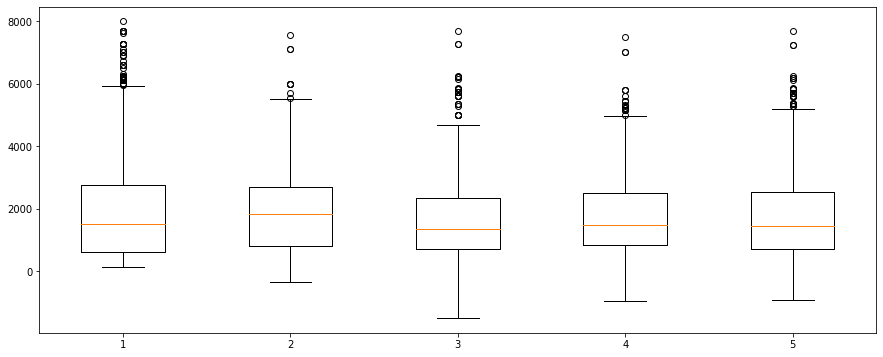

In [52]:
plt.figure(figsize=(15, 6))
plt.boxplot([df['price'], ridge_df['price'], lr_df['price'], lasso_df['price'], elastic_df['price']])
plt.show()

Если посмотреть на линейный график, то все в принципе тоже похоже. Но я предположу, что все же небольшие выбросы моя модель не всегда угадывает, поэтому общий результат не очень.<br>
Пик между 4-5к более или менее уловила вышеупомянутая троица:

<AxesSubplot:>

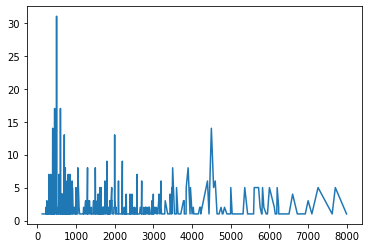

In [53]:
df['price'].value_counts().sort_index().plot()

<AxesSubplot:>

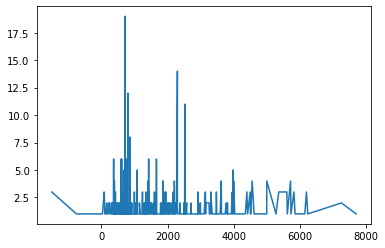

In [54]:
lr_df['price'].value_counts().sort_index().plot()

<AxesSubplot:>

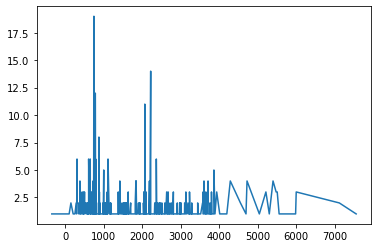

In [55]:
ridge_df['price'].value_counts().sort_index().plot()

<AxesSubplot:>

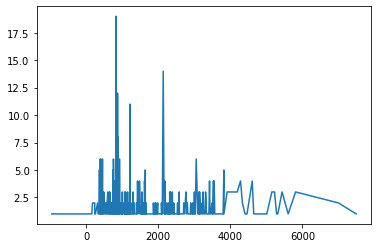

In [56]:
lasso_df['price'].value_counts().sort_index().plot()

<AxesSubplot:>

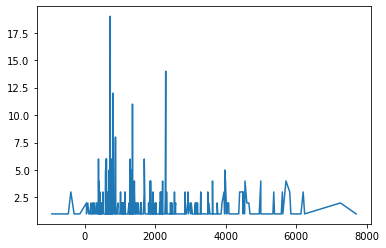

In [57]:
elastic_df['price'].value_counts().sort_index().plot()

Все модели предсказали отрицательные значения, но лучше всего справился Ridge:

In [58]:
print(df['price'].min())
print(ridge_df['price'].min())
print(lr_df['price'].min())
print(lasso_df['price'].min())
print(elastic_df['price'].min())

127.0
-343.85417379621686
-1497.9555914850202
-954.9791103678876
-937.8509922075477


С макс значениями все близки, но получше будет линейная регрессия.

In [59]:
print(df['price'].max())
print(ridge_df['price'].max())
print(lr_df['price'].max())
print(lasso_df['price'].max())
print(elastic_df['price'].max())

7992.0
7552.955930731997
7701.999948933658
7493.609618304199
7700.054246289668


Я бы выбрал <b>Ridge</b>, потому что в общем плане он же все же ближе к истине, судя по графикам. Да и оценки модели у него почти лучшие.<br> Хотя, от раза в раз, показатели меняются, и иногда лучше себя показывает <b>Elastic</b> или <b>Lasso</b>

* Улучшить модели можно было бы, если сказать им, что нельзя предсказывать отрицательные значения
* Можно иначе лемматизировать (не убирать стопслова, например)

Слабые места: <br>
* Отрицательные значения
* Выбросы <p>

Сильные места: <br>
* В общем предсказывает правильно
* Некоторые высокие цены все же отгадала

# Часть 2

Конвертирую дф во что-то более удобное

In [60]:
df2 = df[['reviews', 'reviews_rating']].copy()

In [61]:
revs = list()
revs = [rev for li in df2['reviews'] for rev in li]

rats = list()
rats = [rev for li in df2['reviews_rating'] for rev in li]

In [62]:
df2 = pd.DataFrame(list(zip(revs, rats)),
                  columns=['reviews', 'reviews_rating'])

In [63]:
df2

,reviews,reviews_rating
0,Not happy with product,1
1,It's not as expected.,1
2,AVERAGE PRODUCT,3
3,Pic more beautiful,3
4,Got damage product. But quality is average for...,3
...,...,...
9560,Go for it!,5
9561,Excellent product,5
9562,Nice shoe,5
9563,Nice,5


Что можно сказать? Обычно оценки либо очень хорошие, либо очень плохие. Но истина как всегда чуть больше середины

In [64]:
df2.describe()

,reviews_rating
count,9565.000000
mean,3.763722
std,1.531491
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


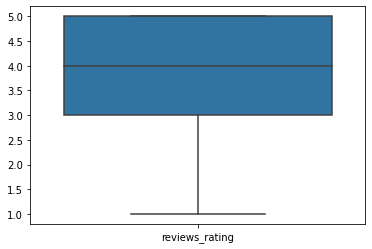

In [65]:
ax = sns.boxplot(data=df2[['reviews_rating']])

##### Судя по графикам, надо использовать микро-скоринги (несбалансированные графики)

<AxesSubplot:>

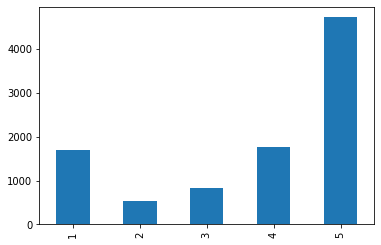

In [66]:
df2['reviews_rating'].value_counts().sort_index().plot.bar()

In [67]:
for ind, descr in tqdm(enumerate(df2['reviews'])):
    descr = [word.lower().strip().strip(punctuation) for word in nltk.word_tokenize(descr)]
    descr = [lemmatizer.lemmatize(w) for w in descr]
    descr = [word for word in descr if word != '' or word != ' ']
    descr = ' '.join([x for x in descr if x not in stopwords.words('english')])   
    df2['reviews'][ind] = descr
    if df2['reviews'][ind] == '':
        df2 = df2.drop(ind)

df2 = df2.reset_index(drop=True)

9565it [00:12, 748.56it/s]


Попробовав разные варианты, я решил, что лучше ничего особо не чистить. Могут встречаться смайлики, а они вполне влияют на отзыв (например, смайлики ❤😍 показывают, что отзыв вероятно положительный).<br>
Было бы вообще интересно поизучать это.

In [68]:
def scoring2(predicted,  y2_test):
    acc = accuracy_score(predicted, y2_test)
    micro_f1 = f1_score(predicted, y2_test, average = 'micro')
    micro_p = precision_score(predicted, y2_test, average = 'micro')
    micro_r = recall_score(predicted, y2_test, average = 'micro')
    macro_f1 = f1_score(predicted, y2_test, average = 'macro')
    macro_p = precision_score(predicted, y2_test, average = 'macro')
    macro_r = recall_score(predicted, y2_test, average = 'macro')
    print('acc={0:1.4f}'.format(acc))
    print('micro F1={0:1.4f}, micro P={1:1.4f}, micro R={2:1.4f}'.format(micro_f1, micro_p, micro_r))
    print('macro F1={0:1.4f}, macro P={1:1.4f}, macro R={2:1.4f}\n'.format(macro_f1, macro_p, macro_r))

In [69]:
corpus2 = []
for row in df2['reviews']:
    corpus2.append(row)

In [70]:
y2 = np.array(df2['reviews_rating'])

### TF IDF

In [71]:
vect2 = TfidfVectorizer()
X2 = vect2.fit_transform(corpus2)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=42)

### CountVectorizer

In [72]:
vect3 = CountVectorizer()
X3 = vect3.fit_transform(corpus2)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y2, random_state=42)

### KNN

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [91]:
def KNC(x_train, y_train):
    model = KNeighborsClassifier()
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

    space = dict()
    space['n_neighbors'] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    space['weights'] = ['uniform', 'distance']
    space['p'] = [1, 2]
    space['metric'] = ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'wminkowski', 'seuclidean', 'mahalanobis']

    search = GridSearchCV(model, space, scoring='f1_micro', n_jobs=-1, cv=cv)
    result = search.fit(x_train, y_train)
    print('Best Score: %s' % result.best_score_)
    print('Best Hyperparameters: %s' % result.best_params_)

In [78]:
KNC(X2_train, y2_train)

Best Score: 0.6085706176259011
Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}


In [79]:
KNC(X3_train, y3_train)

Best Score: 0.6201337920302231
Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}


In [93]:
KNC_TFIDF = KNeighborsClassifier(metric='euclidean', n_neighbors=9, p=1, weights='distance').fit(X2_train, y2_train)
KNC_TFIDF_predicted = KNC_TFIDF.predict(X2_test)
scoring2(KNC_TFIDF_predicted, y2_test)

acc=0.6145
micro F1=0.6145, micro P=0.6145, micro R=0.6145
macro F1=0.4720, macro P=0.4373, macro R=0.5645



In [90]:
KNC_BoW = KNeighborsClassifier(metric='euclidean', n_neighbors=10, p=1, weights='distance').fit(X3_train, y3_train)
KNC_BoW_predicted = KNC_BoW.predict(X3_test)
scoring2(KNC_BoW_predicted, y3_test)

acc=0.6221
micro F1=0.6221, micro P=0.6221, micro R=0.6221
macro F1=0.4849, macro P=0.4475, macro R=0.5993



# MultinomialNB

In [94]:
from sklearn.naive_bayes import MultinomialNB

def MNB(x_train, y_train):
    model = MultinomialNB()
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

    space = dict()
    space['class_prior'] = [None, 0, 1, 2]
    space['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
    space['fit_prior'] = [True, False]

    search = GridSearchCV(model, space, scoring='f1_micro', n_jobs=-1, cv=cv)
    result = search.fit(x_train, y_train)
    print('Best Score: %s' % result.best_score_)
    print('Best Hyperparameters: %s' % result.best_params_)

In [95]:
MNB(X2_train, y2_train)

Best Score: 0.6240035821421406
Best Hyperparameters: {'alpha': 0.1, 'class_prior': None, 'fit_prior': True}


In [96]:
MNB(X3_train, y3_train)

Best Score: 0.6250761694568553
Best Hyperparameters: {'alpha': 1, 'class_prior': None, 'fit_prior': True}


In [97]:
MultinomialNB_TFIDF = MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True).fit(X2_train, y2_train)
MultinomialNB_TFIDF_predicted = MultinomialNB_TFIDF.predict(X2_test)
scoring2(MultinomialNB_TFIDF_predicted, y2_test)

acc=0.6292
micro F1=0.6292, micro P=0.6292, micro R=0.6292
macro F1=0.4326, macro P=0.4167, macro R=0.5099



In [98]:
MultinomialNB_BoW = MultinomialNB(alpha=1, class_prior=None, fit_prior=True).fit(X3_train, y3_train)
MultinomialNB_BoW_predicted = MultinomialNB_BoW.predict(X3_test)
scoring2(MultinomialNB_BoW_predicted, y3_test)

acc=0.6216
micro F1=0.6216, micro P=0.6216, micro R=0.6216
macro F1=0.3945, macro P=0.3857, macro R=0.5363



# Logistic Regression

Я тестировал разные параметры, убрал очень ресурсоемкие и незначительные

In [99]:
from sklearn.linear_model import LogisticRegression

def LR(x_train, y_train):
    model = LogisticRegression()
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

    space = dict()
    space['penalty'] = ['l1', 'l2', 'elasticnet']
    #space['dual'] = [True, False]
    space['C'] = [1e-2, 1e-1, 1, 10, 100]
    #space['fit_intercept'] = [True, False]
    space['solver'] = ['newton-cg', 'lbfgs', 'sag', 'saga']
    #space['warm_start'] = [True, False]
    #space['l1_ratio'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
 
    
    search = GridSearchCV(model, space, scoring='f1_micro', n_jobs=-1, cv=cv)
    result = search.fit(x_train, y_train)
    print('Best Score: %s' % result.best_score_)
    print('Best Hyperparameters: %s' % result.best_params_)

In [100]:
LR(X2_train, y2_train)

Best Score: 0.6315570410461943
Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


In [101]:
LR(X3_train, y3_train)

Best Score: 0.6358008028826784
Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}


In [102]:
Log_R_TFIDF = LogisticRegression(C=10, penalty='l2', solver='lbfgs').fit(X2_train, y2_train)
Log_R_TFIDF_predicted = Log_R_TFIDF.predict(X2_test)
scoring2(Log_R_TFIDF_predicted, y2_test)

acc=0.6384
micro F1=0.6384, micro P=0.6384, micro R=0.6384
macro F1=0.4515, macro P=0.4312, macro R=0.5407



In [104]:
Log_R_BoW = LogisticRegression(C=1, penalty='l2', solver='newton-cg').fit(X3_train, y3_train)
Log_R_BoW_predicted = Log_R_BoW.predict(X3_test)
scoring2(Log_R_BoW_predicted, y3_test)

acc=0.6305
micro F1=0.6305, micro P=0.6305, micro R=0.6305
macro F1=0.4178, macro P=0.4011, macro R=0.5616



# RidgeCl

In [105]:
from sklearn.linear_model import RidgeClassifier

In [106]:
def RidgeCl(x_train, y_train):
    model = RidgeClassifier()
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

    space = dict()
    space['alpha'] = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    space['fit_intercept'] = [True, False]
    space['normalize'] = [True, False]
    space['solver'] = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
    #space['warm_start'] = [True, False]
    #space['l1_ratio'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
 
    
    search = GridSearchCV(model, space, scoring='f1_micro', n_jobs=-1, cv=cv)
    result = search.fit(x_train, y_train)
    print('Best Score: %s' % result.best_score_)
    print('Best Hyperparameters: %s' % result.best_params_)

In [107]:
RidgeCl(X2_train, y2_train)

Best Score: 0.6349618377889895
Best Hyperparameters: {'alpha': 1, 'fit_intercept': True, 'normalize': False, 'solver': 'sag'}


In [108]:
RidgeCl(X3_train, y3_train)

Best Score: 0.6316509988728324
Best Hyperparameters: {'alpha': 1, 'fit_intercept': True, 'normalize': False, 'solver': 'sag'}


In [109]:
RC_TFIDF = RidgeClassifier(alpha=1, fit_intercept=True, solver='sag', normalize=False).fit(X2_train, y2_train)
RC_TFIDF_predicted = RC_TFIDF.predict(X2_test)
scoring2(RC_TFIDF_predicted, y2_test)

acc=0.6313
micro F1=0.6313, micro P=0.6313, micro R=0.6313
macro F1=0.4277, macro P=0.4102, macro R=0.5398



In [110]:
RC_BoW = RidgeClassifier(alpha=1, fit_intercept=True, solver='sag', normalize=False).fit(X3_train, y3_train)
RC_BoW_predicted = RC_BoW.predict(X3_test)
scoring2(RC_BoW_predicted, y3_test)

acc=0.6267
micro F1=0.6267, micro P=0.6267, micro R=0.6267
macro F1=0.4261, macro P=0.4070, macro R=0.5329



Визуализация

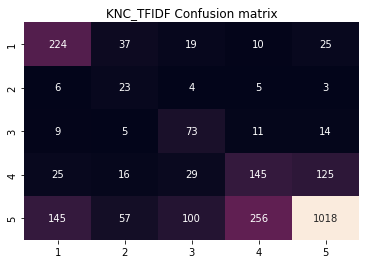

In [111]:
knc_cm = confusion_matrix(KNC_BoW_predicted, y2_test)
cm_df = pd.DataFrame(knc_cm,
                     index = [1, 2, 3, 4, 5], 
                     columns = [1, 2, 3, 4, 5])
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)
plt.title("KNC_TFIDF Confusion matrix")
plt.show()

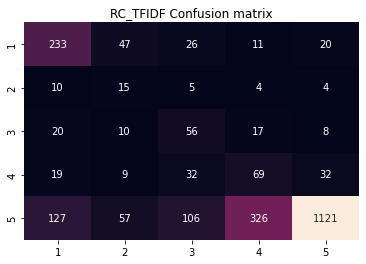

In [112]:
rc_cm = confusion_matrix(RC_BoW_predicted, y2_test)
cm_df = pd.DataFrame(rc_cm,
                     index = [1, 2, 3, 4, 5], 
                     columns = [1, 2, 3, 4, 5])
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)
plt.title("RC_TFIDF Confusion matrix")
plt.show()

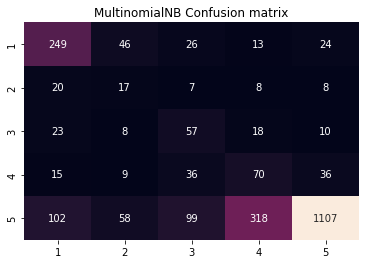

In [113]:
mnb_cm = confusion_matrix(MultinomialNB_TFIDF_predicted, y2_test)
cm_df = pd.DataFrame(mnb_cm,
                     index = [1, 2, 3, 4, 5], 
                     columns = [1, 2, 3, 4, 5])
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)
plt.title("MultinomialNB Confusion matrix")
plt.show()

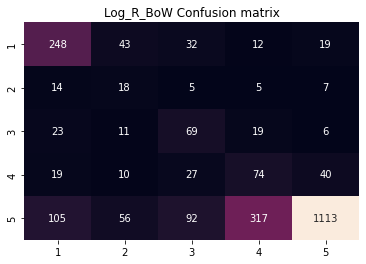

In [114]:
lr_cm = confusion_matrix(Log_R_TFIDF_predicted, y2_test)
cm_df = pd.DataFrame(lr_cm,
                     index = [1, 2, 3, 4, 5], 
                     columns = [1, 2, 3, 4, 5])
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)
plt.title("Log_R_BoW Confusion matrix")
plt.show()

Лучше всего справились <b>логистическая регрессия</b> и <b>MultinomialNB</b> - у них меньше всего неправильно предсказанных классов.<br>
На других моделях есть небольшие смазы с другими классами.

Наблюдения:<br>
* Разница между векторайзерами мизерная

Минусы:
* Неправильно предсказывается 4 звезды вместо 5 + вместо 1 звезды ставится 5
* Долгий серч

Плюсы:
* В основном они предсказывают правильно (то есть хорошо различает плохие отзывы и нормально хорошие)
* Хороший микро критерий

Что улучшить? <br>
* Нормализовать классы
* Не удалять стопслова
* Попробовать нграммы в OneVsRestClassifier
